# Capstone Project - Car Accident Severity
### Applied Data Science Capstone by IBM/Coursera


## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Prediction](#prediction)
* [Results and Evaluation](#results)
* [Discussion](#discussion)
* [Conclusion](#conclusion)


## Introduction: Business Problem <a name="introduction"></a>

The area of Seattle, Washington is one of the largest seaport towns in the Western Washington state, with over 700,000 people living in one location. Along with a bustling economy and foot traffic, there’s no wonder why there are traffic accidents every day. According to Colburn Law's Website (2020), "in 2015, a [car] crash occurred in the State of Washington every 4.5 minutes.” Several hundred individuals die on these roadways each year to where the local government wants to use data analysis to figure out the leading causes of these incidents, as well as to see if there are any predictable variables within these accidents that they can use to adjust their roadways and/or traffic flow.  

In this Capstone project, I will attempt to find the leading factors to traffic accidents in the Seattle, Washinton Area. Specifically, this report will targeting the local Seatlle Government to provide more specific information about the **severity traffic accidents** in the city. More specifically, I will leverage the accident data that I found to **predict the different accidents' severity,** by building a **machine learning (ML) model to predict accident severity**, based on fatilities, traffic delays, and other related data.    

I will use my best data science skills to recommend new policies for traffic laws for these government officials. Changes will be clearly expressed so that the best policies can be chosen by stakeholders.

References
Colburn Law (2020) 2019 Washington State Car Accident and Statistics & Reports. https://www.colburnlaw.com/seattle-traffic-accidents/


## Data <a name="data"></a>
After obtaining a greater understanding of the issues with traffic accidents in the Seattle, Washington area, I decided to use the sample **"Data-Collisions.csv"** file, provided by *IBM Watson* to assist in the the prediction of traffic accidents' severity. The data included contain accident records in Seattle of a date range from 01January2004 to 02May2020. In the data set, there are 194673 events. 

Based on definition of our problem, factors that will influence decisions makers are the following:
* Number of pedestrians in the various mediums (e.g., in vehicles, bicycles, walking, etc.)
* Number of vehicles involved
* Other environmental factors of contribution (e.g., weather, road conditions, lighting)
* Along with the severity level of the accident 

As a result, the following attributes will be analyzed:
* The target for prediction being **SEVERITYCODE**, as that is what is used to measure the severity of the accident. This column has two possible values, as follows: 
** 1 - Property Damage
** 2 - Injury
* The features that will be used to predict the severity level are the following:
** PEDCOUNT
** PEDCYLCOUNT
** VEHCOUNT
** WEATHER
** ROADCOND
** LIGHTCOND
** and the newly created 'Seattle Seasons'

* Note: Some of these items are categorial and will need to be changed so that the ML models can handle these items. 


Following data sources will be needed to generate the required information:
* Seasons of the year for Seattle obtained using a **Google search of "Seattle, Washington Seasons"** 



In [1]:
# Import packages needed for the notebook
import pandas as pd
import numpy as np
import csv
import os
import datetime as dt
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

print('Import Complete')

#Create directory for graph save:
mydir = 'Car_Accident_Charts'
if not os.path.isdir(mydir):
    os.mkdir(mydir)
print('Directory Creation Complete')

Import Complete
Directory Creation Complete


In [2]:
#Upload sample data for analysis. This includes the setting of display.max_columns to see all of the columns in the data set. 
pd.set_option('display.max_columns', None)
df1 = pd.read_csv('Data-Collisions.csv')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Make a copy of the data frame for editing
df = df1.copy()

In [4]:
#Obtain basic statistics about the data set
data_info  = 'The following are the descriptive stats of the dataframe: \n'
data_info += '\t Data Shape: ' + str(df.shape) + '\n'
data_info += '\n'
data_info += '\t Data columns: ' + str(df.columns) + '\n'
data_info += '\n'
data_info += '\t Descriptive Statistics: ' + str(df.describe) + '\n'
data_info += '\n'
data_info += '\t Data Types: ' + str(df.dtypes) + '\n'
print(data_info)

The following are the descriptive stats of the dataframe: 
	 Data Shape: (194673, 38)

	 Data columns: Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

	 Descriptive Statistics: <bound method NDFrame.describe of         SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY  \
0                  2 -122.323148  47.703140         1    1307       1307   
1                  1 -122.347294  47.647172         2   52200      52200   
2                  

In [6]:
# View the first 3 rows of the data frame
df[:3]

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N


Now, lets reduce the data set to the columns really needed for analysis. 

## Methodology <a name="methodology"></a>

In [8]:
#Reduce the data frame to the intended columns for use in analysis
col = ['SEVERITYCODE', 'INCDTTM','PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
        'WEATHER', 'ROADCOND', 'LIGHTCOND']
accidents = df[col]
accidents[:5]

,SEVERITYCODE,INCDTTM,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND
0,2,3/27/2013 2:54:00 PM,2,0,0,2,Overcast,Wet,Daylight
1,1,12/20/2006 6:55:00 PM,2,0,0,2,Raining,Wet,Dark - Street Lights On
2,1,11/18/2004 10:20:00 AM,4,0,0,3,Overcast,Dry,Daylight
3,1,3/29/2013 9:26:00 AM,3,0,0,3,Clear,Dry,Daylight
4,2,1/28/2004 8:04:00 AM,2,0,0,2,Raining,Wet,Daylight


Let's do some data cleaning. We need to remove any **null** or **NaN** values from our data, so that the ML algorithms behave correctly. 

In [9]:
# Check for invalid values, such as Null or NaNs. 
accidents[col].isnull().sum()

SEVERITYCODE       0
INCDTTM            0
PERSONCOUNT        0
PEDCOUNT           0
PEDCYLCOUNT        0
VEHCOUNT           0
WEATHER         5081
ROADCOND        5012
LIGHTCOND       5170
dtype: int64

In [10]:
# Drop the rows that have null or NaN values. Then, reset the indexes
accidents = accidents.dropna()
accidents = accidents.reset_index()
accidents

,index,SEVERITYCODE,INCDTTM,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND
0,0,2,3/27/2013 2:54:00 PM,2,0,0,2,Overcast,Wet,Daylight
1,1,1,12/20/2006 6:55:00 PM,2,0,0,2,Raining,Wet,Dark - Street Lights On
2,2,1,11/18/2004 10:20:00 AM,4,0,0,3,Overcast,Dry,Daylight
3,3,1,3/29/2013 9:26:00 AM,3,0,0,3,Clear,Dry,Daylight
4,4,2,1/28/2004 8:04:00 AM,2,0,0,2,Raining,Wet,Daylight
...,...,...,...,...,...,...,...,...,...,...
189332,194668,2,11/12/2018 8:12:00 AM,3,0,0,2,Clear,Dry,Daylight
189333,194669,1,12/18/2018 9:14:00 AM,2,0,0,2,Raining,Wet,Daylight
189334,194670,2,1/19/2019 9:25:00 AM,3,0,0,2,Clear,Dry,Daylight
189335,194671,2,1/15/2019 4:48:00 PM,2,0,1,1,Clear,Dry,Dusk


After review of the documentation for the data set, the columns of interest here for possible predictive value for **SEVERITYCODE** are the following:
* WEATHER
* ROADCOND
* LIGHTCOND

Great, we can move forward! Or, not so much. There are still columns with categorical data in them, but ML algorithms need numbers instead. Oh boy, there's still data cleaning to do. 

First, lets get a better understanding of what is actually inside the **WEATHER**, **ROADCOND** and **LIGHTCOND** columns.

In [13]:
def create_barh_plot(df, title, save, color):
    plt.figure(figsize=(15,7))
    ax = df.plot(kind='barh', color = color )
    plt.xlabel('Counts')
    plt.ylabel('Types')
    ax.xaxis.label.set_fontsize(18)
    ax.yaxis.label.set_fontsize(18)
    graph_title = title
    plt.title(graph_title, fontsize = 20, fontweight = 'bold')
    graph_title_for_save = save
    plt.savefig('Car_Accident_Charts/'+ graph_title_for_save + '.png')
    plt.show()

Clear                       111008
Raining                      33117
Overcast                     27681
Unknown                      15039
Snowing                        901
Other                          824
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               55
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64


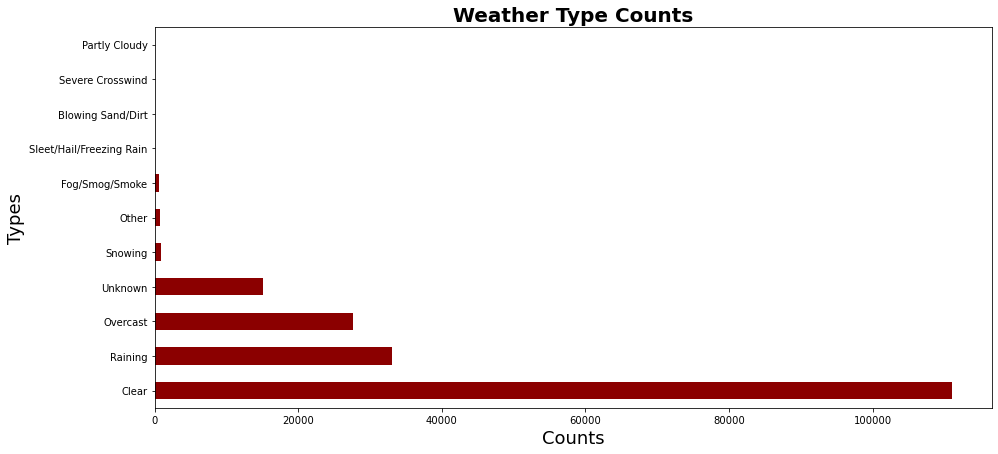

In [15]:
weather = accidents.WEATHER.value_counts()
print(weather)
create_barh_plot(weather, 'Weather Type Counts', 'weather_counts', 'darkred')

Perfect. Now, we see that the **WEATHER** column has 11 different options for values. We can see that the option for a 'Clear' with 1,11,135 weather patterns is more prevelant, with 'Rain' being at 33,145 next following closely with 'Overcast' with 27,714. Okay, lets move on to the next column. 

Dry               124300
Wet                47417
Unknown            15031
Ice                 1206
Snow/Slush           999
Other                131
Standing Water       115
Sand/Mud/Dirt         74
Oil                   64
Name: ROADCOND, dtype: int64


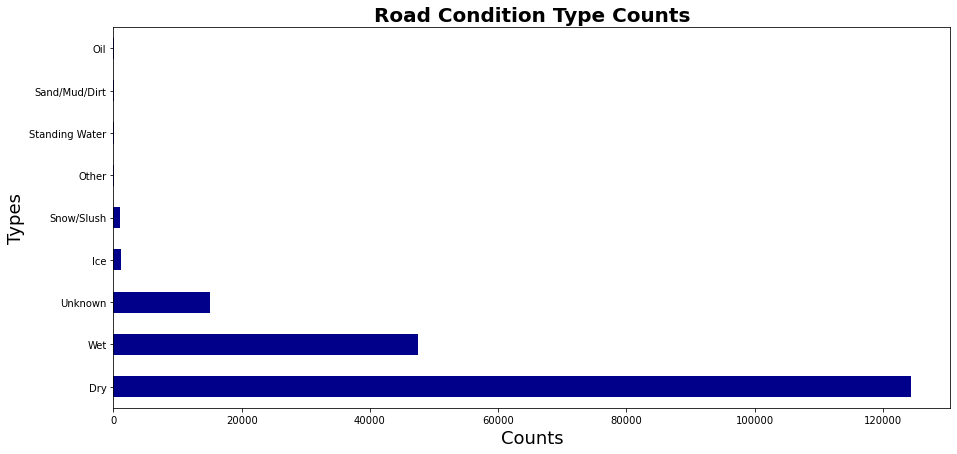

In [18]:
roadcond = accidents.ROADCOND.value_counts()
print(roadcond)
create_barh_plot(roadcond, 'Road Condition Type Counts', 'roadcond_counts', 'darkblue')

Now, we see for **ROADCOND** has 9 options for values, with 'Dry' coming in at 124,510 being the most apparent. Moving on...

Daylight                    116077
Dark - Street Lights On      48440
Unknown                      13456
Dusk                          5889
Dawn                          2502
Dark - No Street Lights       1535
Dark - Street Lights Off      1192
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64


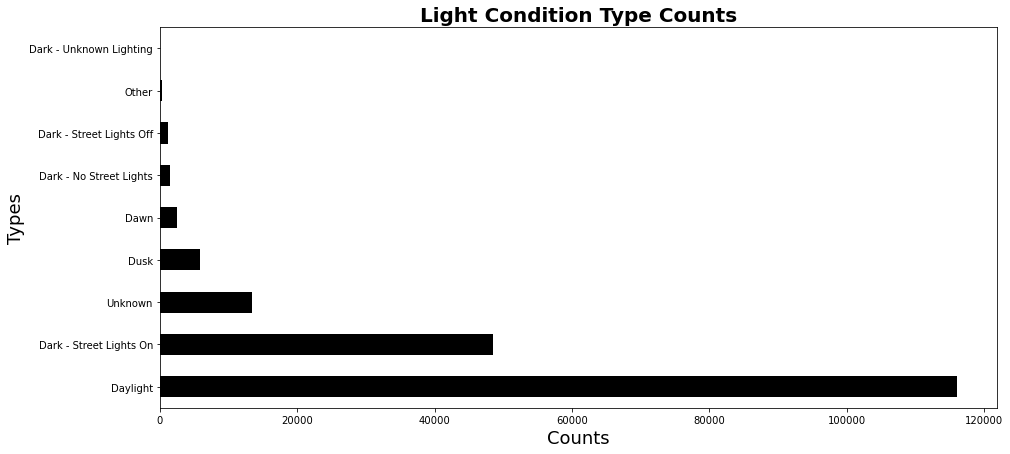

In [19]:
lightcond = accidents.LIGHTCOND.value_counts()
print(lightcond)
create_barh_plot(lightcond, 'Light Condition Type Counts', 'lightcond_counts', 'black')

Lastly, we can see all of the values in **LIGHTCOND** in each value. Hmmm, it looks like 'Daylight' is the most prevelant here with 116,137 records. Hm, the hypothesis of a seasonal effect is looking a bit grim. 

Okay, so now we know the values in each of the columns, let's assign numbers to them. But first, I want to during the **INCDTTM** to a datetime record so I can use the months and the years in separate graphs below. 

In [20]:
#Change INCDTTM to datetime format for extraction of year and month for new columns. 
accidents['INCDTTM_dt'] = pd.to_datetime(accidents.INCDTTM)
accidents['INCDTTM_year'] = accidents.INCDTTM_dt.dt.year
accidents['INCDTTM_month'] = accidents.INCDTTM_dt.dt.month
accidents['INCDTTM_year_str'] = accidents.INCDTTM_year.astype(str)
accidents['INCDTTM_month_str'] = accidents.INCDTTM_month.astype(str)
accidents['INCDTTM_year_month'] = accidents[['INCDTTM_year_str','INCDTTM_month_str']].apply(lambda x: '-'.join(x),axis=1)

In [21]:
#Convert all column's object values to integers. 
weather_dict = {'Overcast':1, 'Raining':2, 'Clear':3, 'Other':4, 'Snowing':5,
               'Fog/Smog/Smoke':6, 'Sleet/Hail/Freezing Rain':7, 'Blowing Sand/Dirt':8,
               'Severe Crosswind':9, 'Partly Cloudy':10}
accidents['WEATHER_int'] = accidents.WEATHER.apply(lambda x: weather_dict.get(x)).fillna(0).astype(int)

roadcond_dict = {'Wet':1, 'Dry':2, 'Unknown':3, 'Snow/Slush':4, 'Ice':5, 'Other':6,
                'Sand/Mud/Dirt':7, 'Standing Water':8, 'Oil':9}
accidents['ROADCOND_int'] = accidents.ROADCOND.apply(lambda x: roadcond_dict.get(x)).fillna(0).astype(int)

light_dict = {'Daylight':1, 'Dark - Street Lights On':2, 'Dark - No Street Lights':3,
             'Unknown':4, 'Dusk':5, 'Dawn':6, 'Dark - Street Lights Off':7,
             'Other':8, 'Dark - Unknown Lighting':9}
accidents['LIGHTCOND_int'] = accidents.LIGHTCOND.apply(lambda x: light_dict.get(x)).fillna(0).astype(int)

#Assign seasons to weather in Seattle, as the seasonality may have an impact on the predictability of accident serverity. 
seattle_seasons = {12:'Winter', 1:'Winter', 2:'Winter',3:'Spring',4:'Spring',5:'Spring', 6:'Summer',7:'Summer', 8:'Summer',9:'Fall',10:'Fall',11:'Fall'}
accidents['SEATTLE_SEASONS'] = accidents.INCDTTM_month .apply(lambda x: seattle_seasons.get(x))

#View the first 5 rows
accidents[:5]

,index,SEVERITYCODE,INCDTTM,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,INCDTTM_dt,INCDTTM_year,INCDTTM_month,INCDTTM_year_str,INCDTTM_month_str,INCDTTM_year_month,WEATHER_int,ROADCOND_int,LIGHTCOND_int,SEATTLE_SEASONS
0,0,2,3/27/2013 2:54:00 PM,2,0,0,2,Overcast,Wet,Daylight,2013-03-27 14:54:00,2013,3,2013,3,2013-3,1,1,1,Spring
1,1,1,12/20/2006 6:55:00 PM,2,0,0,2,Raining,Wet,Dark - Street Lights On,2006-12-20 18:55:00,2006,12,2006,12,2006-12,2,1,2,Winter
2,2,1,11/18/2004 10:20:00 AM,4,0,0,3,Overcast,Dry,Daylight,2004-11-18 10:20:00,2004,11,2004,11,2004-11,1,2,1,Fall
3,3,1,3/29/2013 9:26:00 AM,3,0,0,3,Clear,Dry,Daylight,2013-03-29 09:26:00,2013,3,2013,3,2013-3,3,2,1,Spring
4,4,2,1/28/2004 8:04:00 AM,2,0,0,2,Raining,Wet,Daylight,2004-01-28 08:04:00,2004,1,2004,1,2004-1,2,1,1,Winter


Perfect. Now, lets create a new dataframe with the columns we *think* need for ML predictions.

## Analysis <a name="analysis"></a>

In [22]:
#Create new dataframe to create a correlation heatmap of the different variables for prediction.
int_cols = ['SEVERITYCODE','INCDTTM_dt', 'INCDTTM_year', 'INCDTTM_month', 'INCDTTM_year_str',
       'INCDTTM_month_str', 'INCDTTM_year_month','WEATHER_int', 'ROADCOND_int', 'LIGHTCOND_int', 'SEATTLE_SEASONS']
severity = accidents[int_cols]
severity[:5]

,SEVERITYCODE,INCDTTM_dt,INCDTTM_year,INCDTTM_month,INCDTTM_year_str,INCDTTM_month_str,INCDTTM_year_month,WEATHER_int,ROADCOND_int,LIGHTCOND_int,SEATTLE_SEASONS
0,2,2013-03-27 14:54:00,2013,3,2013,3,2013-3,1,1,1,Spring
1,1,2006-12-20 18:55:00,2006,12,2006,12,2006-12,2,1,2,Winter
2,1,2004-11-18 10:20:00,2004,11,2004,11,2004-11,1,2,1,Fall
3,1,2013-03-29 09:26:00,2013,3,2013,3,2013-3,3,2,1,Spring
4,2,2004-01-28 08:04:00,2004,1,2004,1,2004-1,2,1,1,Winter


Based on one of the above hypotheses, lets take a look at the SEATTLE_SEASONS column. Lets see how many accidents occurred each year per season.

In [23]:
seasons  = severity.groupby(['SEATTLE_SEASONS'])['INCDTTM_year'].sum()
seasons

SEATTLE_SEASONS
Fall      98695381
Spring    95623925
Summer    96847426
Winter    89589995
Name: INCDTTM_year, dtype: int64

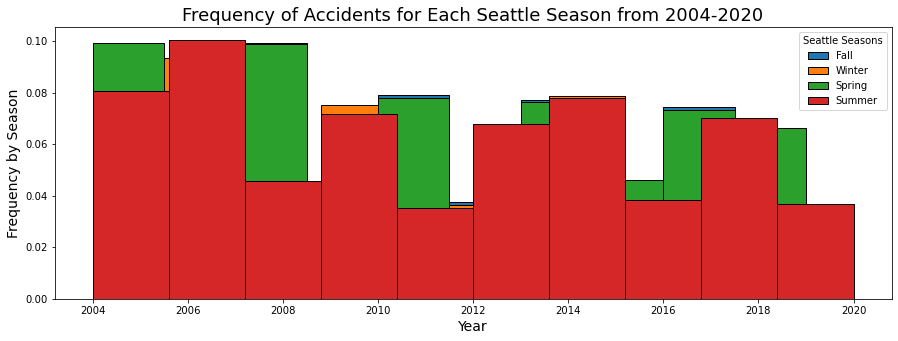

In [30]:
#Plot these values in a histogram
plt.figure(figsize=(15,5))
colors = ['red', 'green', 'blue', 'grey']
# seasons_df.hist(density = True, histtype = 'bar')
severity.groupby(['SEATTLE_SEASONS'])['INCDTTM_year'].hist(density = True, histtype = 'bar', ec='black')
plt.grid(False)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Frequency by Season', fontsize = 14)
plt.title('Frequency of Accidents for Each Seattle Season from 2004-2020', fontsize = 18)
plt.legend(['Fall', 'Winter', 'Spring', 'Summer'], title = 'Seattle Seasons')
graph_title_save = 'season_hist'
plt.savefig('Car_Accident_Charts/' + graph_title_save + '.png')
plt.show()

Well, that's a bummer. There doesn't appear to be any differences across seasons for the provided data. 

Now, let's see what values correlate to one another. Maybe this will lead us in a better direction.

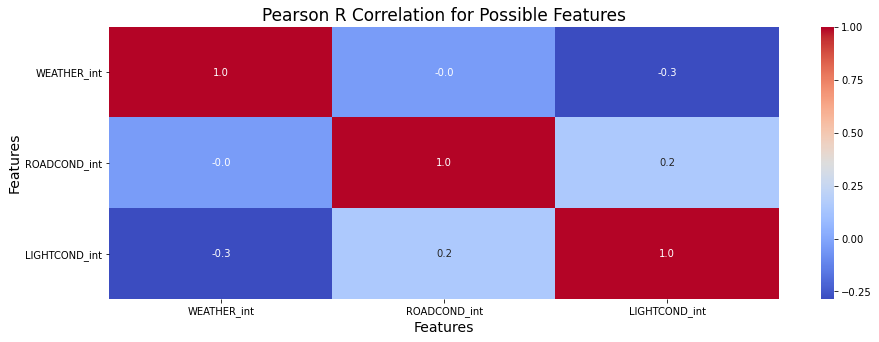

In [26]:
# Create a heatmap based on the Pearson R correlations to each int variable
severity_corr = severity[['WEATHER_int', 'ROADCOND_int', 'LIGHTCOND_int']].corr()
ax = sns.heatmap(severity_corr, cmap='coolwarm', annot=True, fmt='.1f')
ax.figure.set_size_inches(15,5)
plt.xlabel('Features')
plt.ylabel('Features')
ax.xaxis.label.set_fontsize(14)
ax.yaxis.label.set_fontsize(14)
graph_title = 'Pearson R Correlation for Possible Features'
plt.title(graph_title, fontsize = 17)
graph_title_save = 'corr_heatmap'
plt.savefig('Car_Accident_Charts/' + graph_title_save + '.png')
plt.show()

Interesting, now we're getting somewhere. It looks like we have our attributes to use for our ML algorithms. HINT: **WEATHER**, **ROADCOND**, and **LIGHTCOND**.


## Prediction <a name="prediction"></a>

#### Data Preprocessing
In order to use the scikit-learn library, we need to convert the items from Pandas into a Numpy array. 
* X as the feature vector ('WEATHER', 'ROADCOND', 'LIGHCOND')
* y as the predicted variable ('SEVERITYCODE')

The question at hand is a classification problem. I will apply the classification algorithms to provide an answer to the stakeholders. The ML algorithms chosen were Decision Tree, K Nearest Neighbor (KNN), and Logistic Regression.  


In [27]:
X = accidents[['WEATHER_int', 'ROADCOND_int', 'LIGHTCOND_int']].values
X[0:5]

array([[1, 1, 1],
       [2, 1, 2],
       [1, 2, 1],
       [3, 2, 1],
       [2, 1, 1]])

In [28]:
y = accidents[['SEVERITYCODE']].values
y[0:5]

array([[2],
       [1],
       [1],
       [1],
       [2]])

Now, lets split these features into train_test_split, using 80% train and 20% test. 

In [31]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, jaccard_similarity_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
shift_ml = 'ML for Shift \n'
shift_ml += '\t X_train: ' + str(X_train.shape[0]) + '\n'
shift_ml += '\t y_train: ' + str(y_train.shape[0]) + '\n'
shift_ml += '\t X_test: ' + str(X_test.shape[0]) + '\n'
shift_ml += '\t y_test: ' + str(y_test.shape[0]) + '\n'
print(shift_ml)

ML for Shift 
	 X_train: 151469
	 y_train: 151469
	 X_test: 37868
	 y_test: 37868



In [33]:
def heatmap_for_confusion(df):
    fix,ax = plt.subplots(figsize = (15, 7))
    sns.heatmap(df, annot = True, fmt = 'd', cmap= 'Reds')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    graph_title = 'Heatmap for Confusion Matrix for Machine Learning Algorithms' 
    plt.show()    

**Decision Tree Classifier**

According to the website *TowardsDataScience.com* "a Decision Tree is a simple representation for classifying examples. It is a Supervised Machine Learning where the data is continuously split according to a certain parameter.
Decision Tree consists of :

    Nodes : Test for the value of a certain attribute.
    Edges/ Branch : Correspond to the outcome of a test and connect to the next node or leaf.
    Leaf nodes : Terminal nodes that predict the outcome (represent class labels or class distribution)."
![dt_image.png](attachment:dt_image.png)
 
 
TowardsDataScience.com (2020) *Decision Tree Classification*. https://towardsdatascience.com/decision-tree-classification-de64fc4d5aac

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
[[26376    22]
 [11465     5]]
              precision    recall  f1-score   support

           1       0.70      1.00      0.82     26398
           2       0.19      0.00      0.00     11470

   micro avg       0.70      0.70      0.70     37868
   macro avg       0.44      0.50      0.41     37868
weighted avg       0.54      0.70      0.57     37868



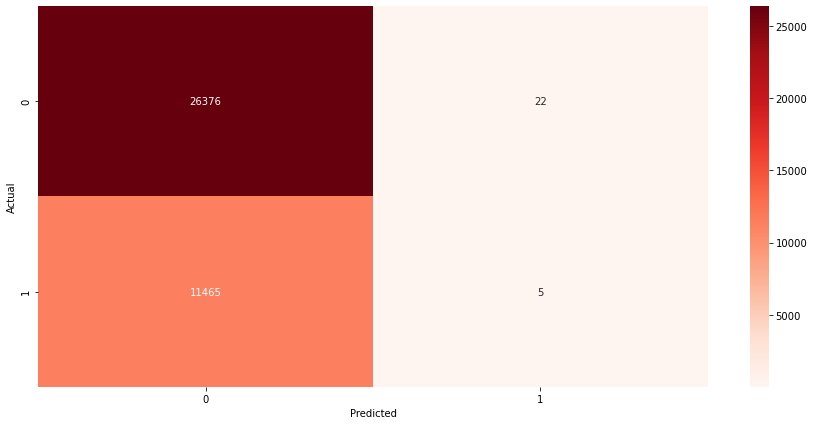

In [37]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
print(model)

model.fit(X_train, y_train)
y_pred_DecisionTree = model.predict(X_test)

conf_mat_DecisionTree = confusion_matrix(y_test, y_pred_DecisionTree)
print(conf_mat_DecisionTree)

class_report = classification_report(y_test, y_pred_DecisionTree)
print(class_report)
heatmap_for_confusion(conf_mat_DecisionTree)

**K Nearest Neighbor (KNN)**

The KNN model is a supervised ml, where the data are 'trained' with points that corresond to their classification. Once a point is predicted, the model takes the nearest 'Kth' points to determine classification. 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


[1 1 1 2 1]
              precision    recall  f1-score   support

           1       0.70      0.84      0.77     26398
           2       0.33      0.18      0.23     11470

   micro avg       0.64      0.64      0.64     37868
   macro avg       0.52      0.51      0.50     37868
weighted avg       0.59      0.64      0.60     37868



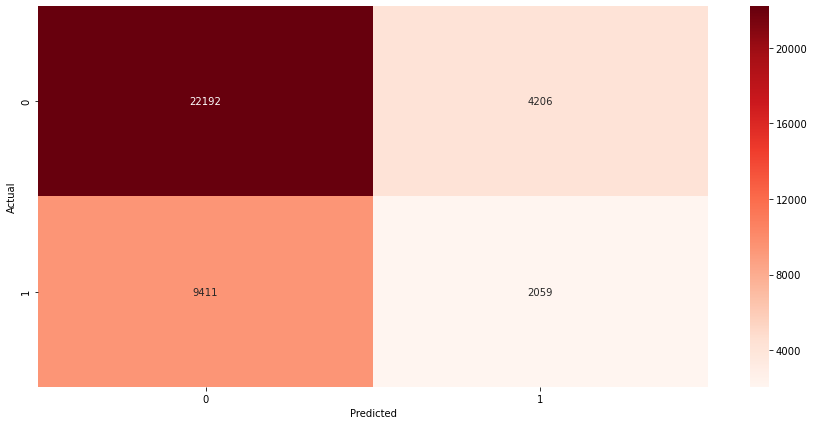

In [34]:
from sklearn.neighbors import KNeighborsClassifier as KNN

model = KNN(n_neighbors = 3)
print(model)

model.fit(X_train, y_train)
y_pred_knn = model.predict(X_test)
print(y_pred_knn[:5])

conf_mat = confusion_matrix(y_test, y_pred_knn)

class_report = classification_report(y_test, y_pred_knn)
print(class_report)
heatmap_for_confusion(conf_mat)

**Logistic Regression**

According to *GeeksforGeeks.com*, "a Logistic regression is basically a supervised classification algorithm. In a classification problem, the target variable(or output), y, can take only discrete values for given set of features(or inputs), X. Contrary to popular belief, logistic regression IS a regression model. The model builds a regression model to predict the probability that a given data entry belongs to the category numbered as “1”. Just like Linear regression assumes that the data follows a linear function, Logistic regression models the data using the sigmoid function."

Geeksforgeeks.org (2020) *Understanding Logistic Regression*. https://www.geeksforgeeks.org/understanding-logistic-regression/

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           1       0.70      1.00      0.82     26398
           2       0.42      0.00      0.00     11470

   micro avg       0.70      0.70      0.70     37868
   macro avg       0.56      0.50      0.41     37868
weighted avg       0.61      0.70      0.57     37868



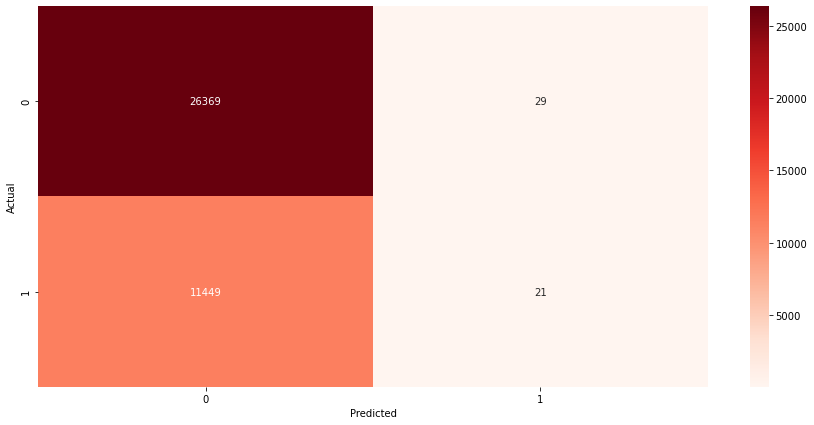

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
print(model)
model.fit(X_train, y_train)
y_pred_logReg = model.predict(X_test)
# print(y_pred_logReg)

conf_mat_logReg = confusion_matrix(y_test, y_pred_logReg)
class_report = classification_report(y_test, y_pred_logReg)
print(class_report)

heatmap_for_confusion(conf_mat_logReg)

## Results and Evaluation <a name="results"></a>



You may be asking yourself, "How do I interpret these output measures?". The definitions are listed here:

According to machinelearningmastery.com(2020) and statisticshowto.com(2020):

* **Precision** quantifies the number of positive class predictions that actually belong to the positive class.
* **Recall** quantifies the number of positive class predictions made out of all positive examples in the dataset.
* **F-Measure** provides a single score that balances both the concerns of precision and recall in one number.
* **Jaccard Index** compares members for two sets to see which members are shared and which are distinct. It’s a measure of similarity for the two sets of data, with a range from 0% to 100%. The higher the percentage, the more similar the two populations. 


References:
Machinelearningmasterty.com(2020).*How to Calculate Precision, Recall, and F-Measure for Imbalanced Classification*.      https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/

Statisticshowto.com(2020). *What is a Jaccard Index?*. https://www.statisticshowto.com/jaccard-index/

In [39]:
#This block of code will provide the Jaccard and F1 Scores for each algorithm's performance
ml_output_scores = 'Jaccard and F1 Scores \n'
ml_output_scores += '\t Decision Trees Scores: ' + '\n'
ml_output_scores += '\t\t f1 score: ' +  str(f1_score(y_test, y_pred_DecisionTree, average='weighted'))+ '\n'
ml_output_scores += '\t\t jaccard score: ' +  str(jaccard_similarity_score(y_test, y_pred_DecisionTree))+ '\n'
ml_output_scores += '\n'
ml_output_scores += '\t KNN Scores: ' + '\n'
ml_output_scores += '\t\t f1 score: ' +  str(f1_score(y_test, y_pred_knn, average='weighted')) + '\n'
ml_output_scores += '\t\t jaccard score: ' +  str(jaccard_similarity_score(y_test, y_pred_knn)) +'\n'
ml_output_scores += '\n'
ml_output_scores += '\t Logistic Regression Scores: ' + '\n'
ml_output_scores += '\t\t f1 score: ' +  str(f1_score(y_test, y_pred_logReg, average='weighted')) + '\n'
ml_output_scores += '\t\t jaccard score: ' +  str(jaccard_similarity_score(y_test, y_pred_logReg))+ '\n'
ml_output_scores += '\n'
print(ml_output_scores)

Jaccard and F1 Scores 
	 Decision Trees Scores: 
		 f1 score: 0.5727151085624445
		 jaccard score: 0.6966568078588782

	 KNN Scores: 
		 f1 score: 0.6037758612768445
		 jaccard score: 0.6404087884229429

	 Logistic Regression Scores: 
		 f1 score: 0.5736090093999446
		 jaccard score: 0.6968944755466356




In [40]:
#Lets see how the models performed
from sklearn.model_selection import cross_validate, cross_val_score

models = [
          KNN(),
          LogisticRegression(),
          DecisionTreeClassifier()
]
CV=5
cv_df = pd.DataFrame(index = range(CV*len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X, y, scoring = 'accuracy', cv = CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    cv_df = pd.DataFrame(entries, columns = ['model_name', 'fold_idx', 'accuracy'])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/skle

In [41]:
#Now, lets gather the average accuracy across Decision Tree, KNN, and Logistic Regression
cv_df.groupby('model_name').accuracy.mean()

model_name
DecisionTreeClassifier    0.698437
KNeighborsClassifier      0.685582
LogisticRegression        0.697983
Name: accuracy, dtype: float64

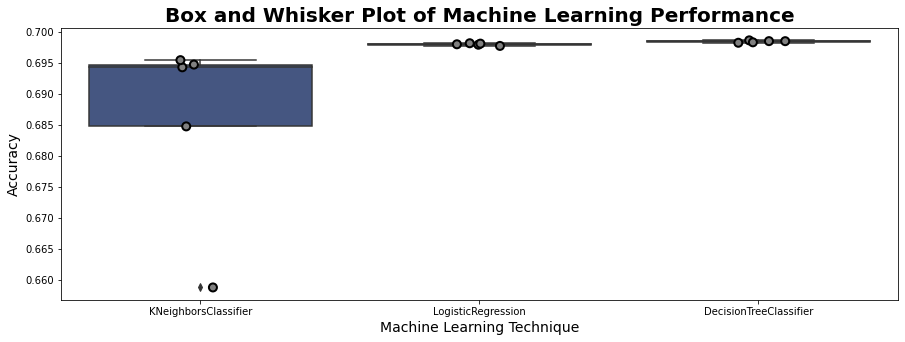

In [42]:
#Box-Whisker Plot of the outputs of the models used above.
f, ax = plt.subplots(figsize = (15,5))
ax = sns.boxplot(x = 'model_name', y = 'accuracy', data = cv_df, palette='viridis')
ax = sns.stripplot(x = 'model_name', y= 'accuracy', data= cv_df, size = 8, jitter = True, color = 'grey',
                   edgecolor = 'black', linewidth = 2)
plt.title ('Box and Whisker Plot of Machine Learning Performance', fontsize = 20, fontweight = 'bold')
ax.set_xlabel('Machine Learning Technique', fontsize = 14)
ax.set_ylabel('Accuracy', fontsize = 14)
graph_title_for_save = ('box_whisker_plot_ML_perf_')
plt.savefig('Car_Accident_Charts/'+ graph_title_for_save + '.png', dpi = 400, bbox_inches = None)
plt.show()

## Discussion <a name="discussion"></a>

In the results above, we used Decision Tree, KNN, and Logisitic Regression to attempt to solve our question for the local government officials of Seattle, Washington. In chosing a Kth value of 3 really improved the accuracy, up to 68.5% accuracy in predicting the severity level. However, Decision Tree accuracy was at 69.8% compared to Logistic Regression, which was at 69.7% accuracy of predicting traffic severity levels in Seattle. 

## Conclusion <a name="conclusion"></a>

By using the sample historical collision data, I chose to use the environmental conditions (i.e., weather, road, and light conditions) that were associated with severity level of accidents in Seattle. I created a machine learning model based on classification algorithms to predict traffic accident severity in Seattle. I would recommend using a Decision Tree or Logistic Regression for prediction of severity levels. 